In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("mpg.csv",header=0)
df 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [3]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [10]:
df.dropna(subset=['horsepower'], axis=0, inplace=True)
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


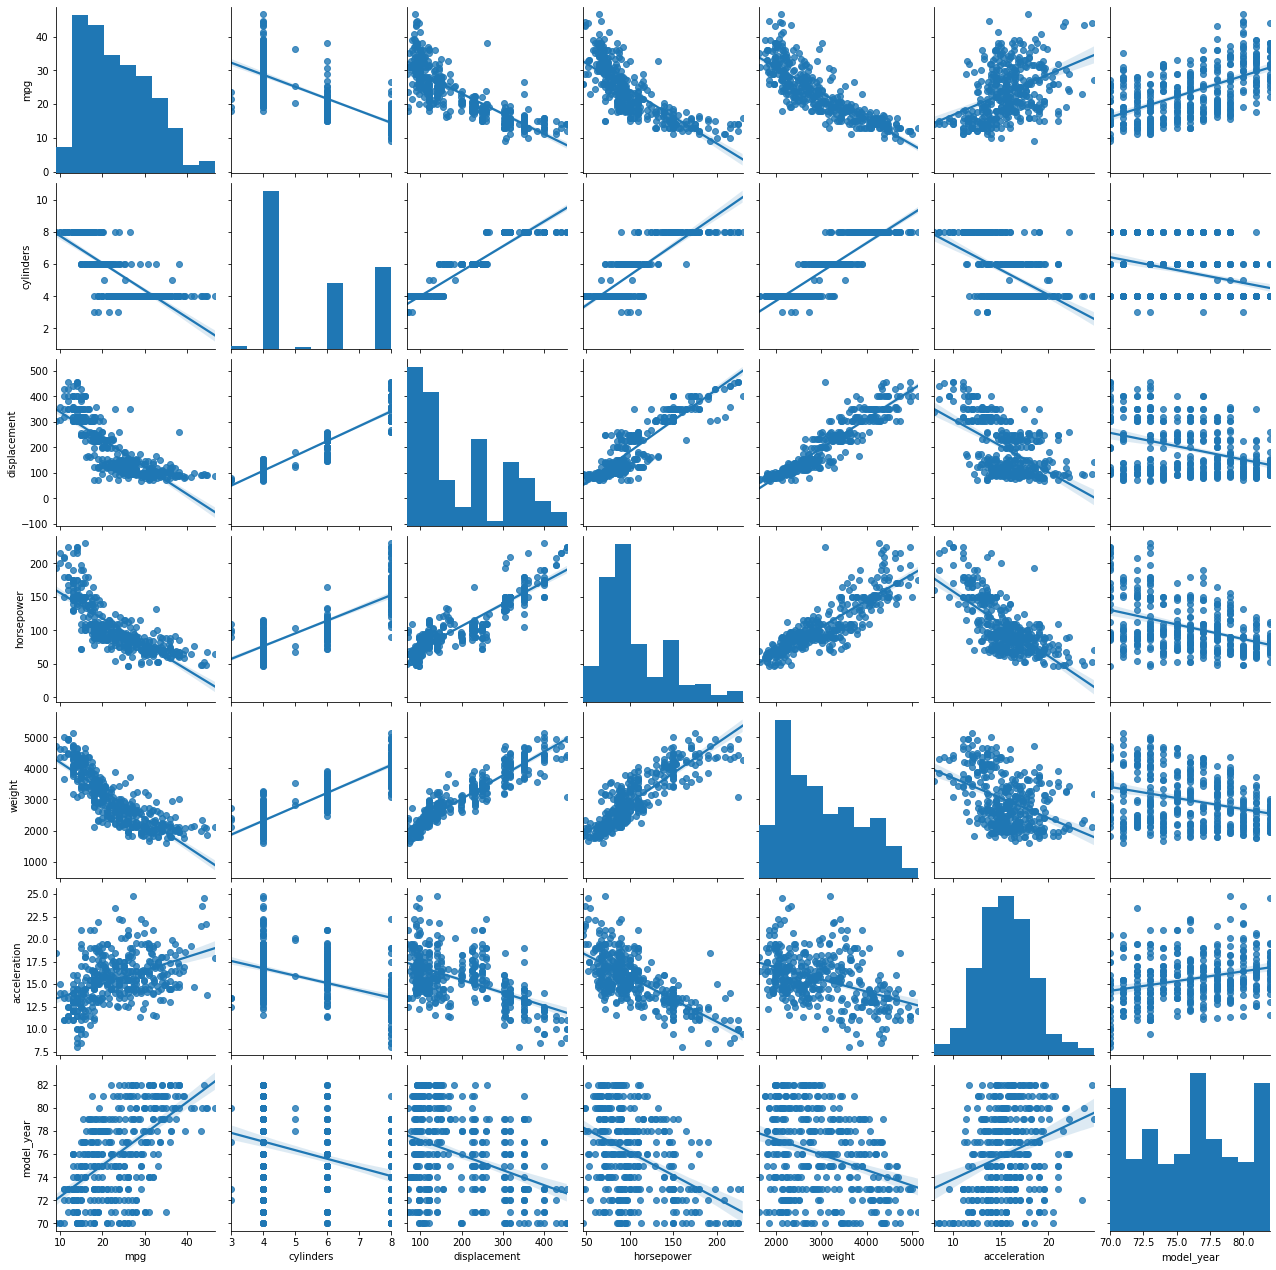

In [11]:
grid_df = sns.pairplot(df, kind='reg')
plt.show()
plt.close()

In [12]:
ndf = df[['mpg', 'displacement', 'horsepower','weight']]

In [13]:
#model1
x1=ndf[['displacement']]
y1=ndf[['mpg']]

from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=10)


In [15]:
from sklearn.linear_model import LinearRegression
lr1=LinearRegression()
lr1.fit(x1_train,y1_train)
r_square=lr1.score(x1_test, y1_test)
print(r_square)

0.6460159729950312


In [17]:
#model2
x2=ndf[['horsepower']]
y2=ndf[['mpg']]

from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=10)

In [18]:
from sklearn.linear_model import LinearRegression
lr2=LinearRegression()
lr2.fit(x2_train,y2_train)
r_square=lr2.score(x2_test, y2_test)
print(r_square)

0.5956667983866821


In [19]:
#model3
x3=ndf[['weight']]
y3=ndf[['mpg']]

from sklearn.model_selection import train_test_split
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.3, random_state=10)

In [21]:
from sklearn.linear_model import LinearRegression
lr3=LinearRegression()
lr3.fit(x3_train,y3_train)
r_square=lr3.score(x3_test, y3_test)
print(r_square)

0.6822458558299325


In [23]:
#model4
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x3_train_poly=poly.fit_transform(x3_train)
print(x3_train.shape)

(274, 1)


In [25]:
pr4 = LinearRegression()
pr4.fit(x3_train_poly, y3_train)

x3_test_poly = poly.fit_transform(x3_test)
r_square = pr4.score(x3_test_poly, y3_test)
print(r_square)

0.7087009262975685


In [26]:
#model5
x5= ndf[['displacement', 'horsepower','weight']]
y5= df[['mpg']]

from sklearn.model_selection import train_test_split
x5_train, x5_test, y5_train, y5_test = train_test_split(x5, y5, test_size=0.3, random_state=10)

In [27]:
lr5 =  LinearRegression()
lr5.fit(x5_train, y5_train)
r_square= lr5.score(x5_test,y5_test)
print(r_square)

0.6993315144604408


model4의 r_square 값이 가장 높음

In [28]:
print(pr4.coef_)

[[ 0.00000000e+00 -1.85768289e-02  1.70491223e-06]]
